# Spatial vector and raster data

![](../assets/vector-raster.png) 

image credit: https://101gis.com/vector-data-vs-raster-data/

You will come across two fundamentally different data types when you work with spatial data, i.e., information about locations on the Earth's surface:
- vector data: geographic data represented as points, lines, or polygons made of vertices and paths (e.g., country borders, roads, rivers, ...)
- raster data: grids of pixel data where each cell represents specific information (e.g. satellite images, population density, elevation data, ... )

## Vector data in geopandas 

Vector data structures are composed of points of discrete geographic locations (x, y, z), also called vertices, that form the shape of an object. Depending on the type of information, we use different vector types like points (e.g., cities), lines (e.g., rivers) or polygons (e.g., countries).

![](../assets/pnt_line_poly.png) 

image credit: National Ecological Observatory Network (NEON)

In practice, we will normally not work with individual geometries, but rather with collections of geometries (e.g., the shapes of all countries, locations of capitals, ...). We can read, modify and visualise these vector layers very easily with the [geopandas package](https://geopandas.org/en/stable/). The main data type in GeoPandas is the `GeoDataFrame`. You can best think of a `GeoDataFrame` as a table of geographical vector data like in the schematic below.

![](../assets/dataframe.svg) 

image credit: https://geopandas.org/en/stable/getting_started/introduction.html

You can store as many geometries as you like in the table in a special 'geometry' column, index them by their row and attach non-spatial attributes (numerical, boolean, strings etc.) to them. 

Note: `geopandas` is using this 'table' approach because it is primarily build upon the `pandas` package, the premier Python tool to work with tabular data, i.e. everything that looks similar to an Excel spreadsheet. As a result, most of the syntax is actually very similar between `pandas` and `geopandas`. We don't cover `pandas` in this course, but if you ever encounter the need to work with this kind of data, there is a great free course developed by the University of Bristol ACRC that you can access [here](https://milliams.com/courses/data_analysis_python/). 

### Loading data with geopandas

`geopandas` can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more using the command:

```python
geopandas.read_file()
```

which returns a GeoDataFrame object. 

One thing that might be slightly confusing initially is that many spatial data formats actually consist of several individual files.

#### Shapefile data structure

A shapefile consists of at least three separate files that all need to have the same name and need to be stored in the same directory. The mandatory files are:

- `.shp`: stores the actual geometries
- `.shx`: stores the geometry index positions 
- `.dbf`: stores the attribute data

In addition, some of the following files are also assciated to the shapefiles:

- `.prj`: stores the metadata associated with the shapefiles coordinate and projection system
- `.xml`: stores the metadata

Let's get started with some example data. These are the cultural vector data form [Natural Earth](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/) describing all the countries in the world.

In [1]:
# load geopandas
import geopandas as gpd
# set a default matplotlib figure size
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

world = gpd.read_file('../assets/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

In [2]:
# get dimensions
world.shape

(177, 169)

169 table data columns for each of the 177 countries

In [3]:
#look at the first couple of rows
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


We only see the first and last columns. This can be changed by importing pandas and changing a single option.

In [4]:
import pandas as pd

# change the global options that Geopandas inherits from
pd.set_option('display.max_columns',None)

In [5]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

Notice the index in the first column, then a lot of attribute data describing each country, and then the geometry in the last column (like in the schematic above).

We can investigate the associated coordinate reference system with:

In [6]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

`geopandas` is a high-level package, i.e. it is very easy to create plots quickly. We can get an overview of all the shapes with the `.plot()` command:

<AxesSubplot: >

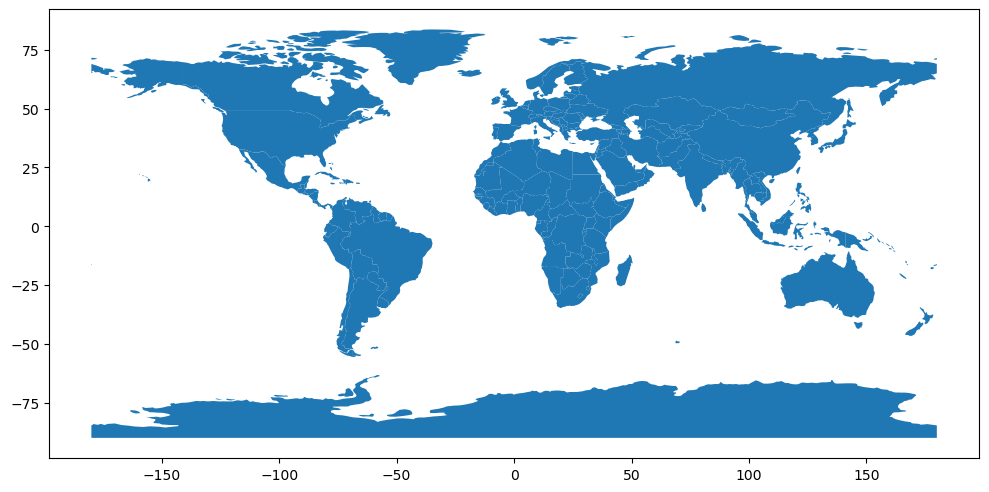

In [7]:
world.plot()

with a lot of [optional parameters](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) for customisation:

<AxesSubplot: >

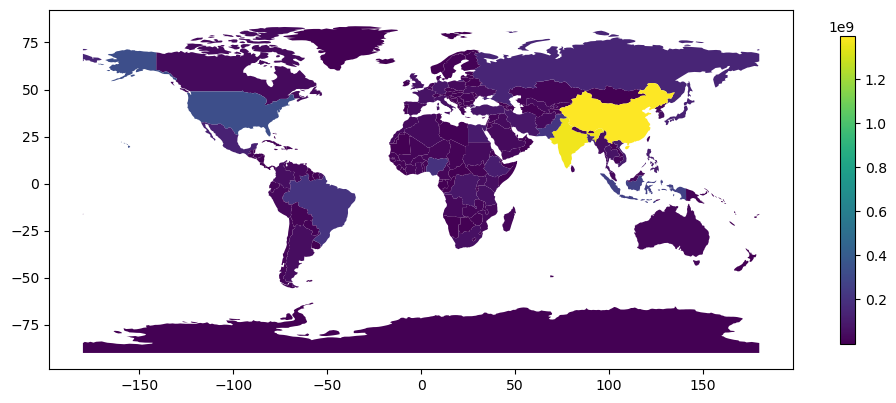

In [8]:
# color countries by population
world.plot(column='POP_EST', legend=True, legend_kwds={"shrink":.5})

we can also easily perform operations on data attribute columns and even create new columns:

old shape (177, 169)
new shape (177, 170)


<AxesSubplot: >

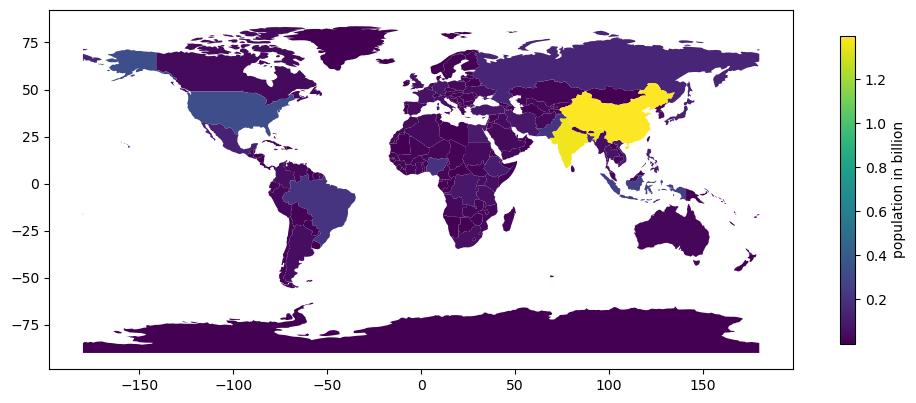

In [9]:
# convert population to billions and save to new column
print(f"old shape {world.shape}")
world['POP_EST_MOD'] = world['POP_EST'] / 1.e9
print(f"new shape {world.shape}")

world.plot(column='POP_EST_MOD', legend=True, legend_kwds={"shrink":.5, "label": "population in billion"})

and have powerfull indexing capabilities:

<AxesSubplot: >

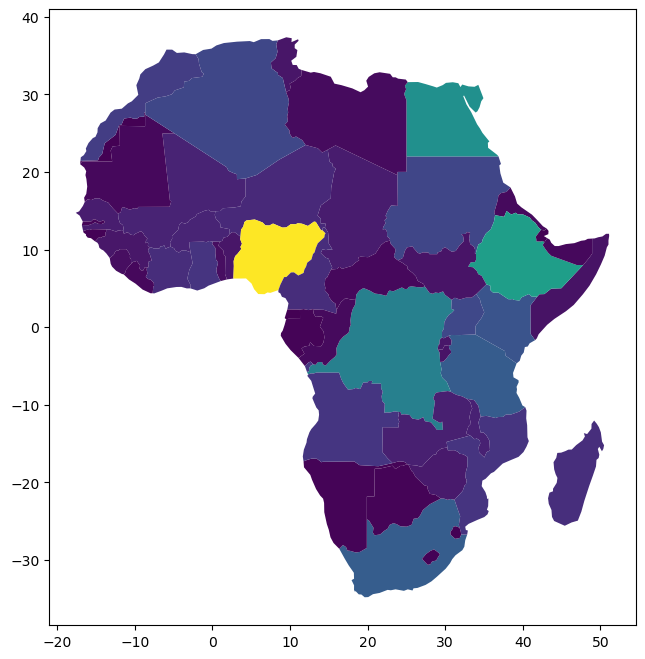

In [10]:
world[world.CONTINENT=='Africa' ].plot(column='POP_EST_MOD')

and can also stack multiple plots on top of each other:

<AxesSubplot: >

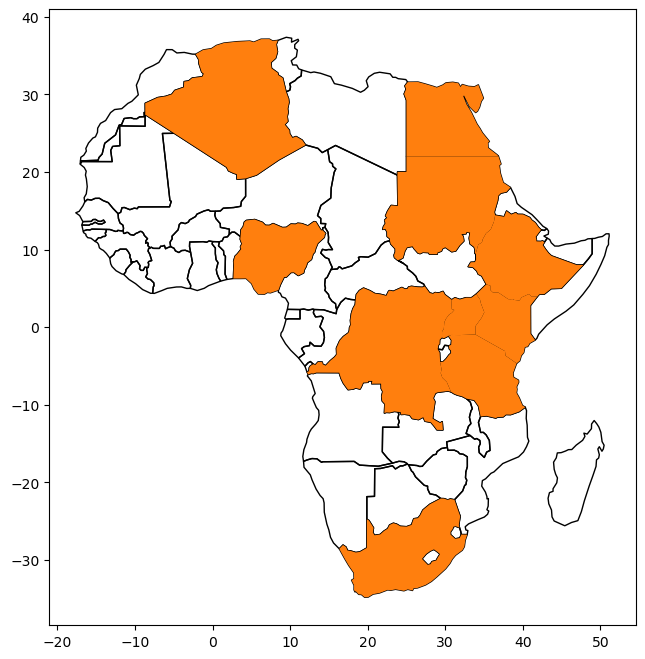

In [11]:
# base plot with only outlines
ax = world[world.CONTINENT=='Africa' ].plot(facecolor='none')
# filled country polygons for countries with populatio > 40 million
world[(world.CONTINENT=='Africa') & (world.POP_EST > 40e6) ].plot(ax=ax, color='tab:orange')

Geopandas can do way more than what we can cover in this course. The [official documentation](https://geopandas.org/en/stable/docs.html) is always a good start if you want to go a bit more into the details or see more examples. We will now work on an exercise to get used handling shapefiles and plotting vector data with `geopandas`.

### Exercise 2
> - to get familiar with `geopandas` let's start working with the countries dataset on our own. Create your own notebook and load the shapefile at:
>
>```bash
> "../assets/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
>```
> - similar to the lecture, make yourself familiar with the dimensions and content of the dataset
> - calculate the GDP per capita for all countries and plot the results as a [chloropleth map](https://en.wikipedia.org/wiki/Choropleth_map)
> - you might see some unexpected result for Antarctica, can you fix it?
> - highlight all countries in your map with a GDP per capita above or below an arbitrary threshold
> - go to the [Natural Earth website](https://www.naturalearthdata.com/downloads/) and browse the available datasets. Download any other vector data you are interested in (e.g. rivers and lakes, US counties, populated places, Antarctic ice shelves, ...). Please note that the 'Cultural' and 'Physical' collections will have different available datsets available depending on the chosen scale. Combine your new data with your country shapefiles and create any map(s) you find interesting. Try also to plot only subsets of regions or countries, depending on your interest and use the documentation to discover some new options and ideas.

[<small>answer</small>](../solutions/country_shapefiles.ipynb)

### Exercise 3
> We are now switching from these global datasets to more regional data. We are going to plan our next holiday or weekend trip in the UK!
> There are a lot of amazing and freely available vector data sets for the UK available. I put a couple of them in the "assets/UK_shapefiles" directory, but feel free to add more datasets if you like. So let's make our own little map to decide where we want to spend our next free weekend!
> - we want to enjoy the beautiful UK countryside, so let's start by loading the shapefiles for the [Areas of Outstanding Natural Beauty (AONBs)](https://landscapesforlife.org.uk/about-aonbs/aonbs/overview) and the [UK Nationakl Parks](https://www.nationalparks.uk/parks/) (the data is already downloaded)
    - load them with `geopandas`, analyse the shapes, dimensions, projection, and attributes and plot all regions onto a single map
    - always make sure that all datasets use the same CRS (you can check it with the method .crs on any `geopandas`GeoDataFrame)
> - we need to get to those nice places somehow, so the next we use the [Strategi regional dataset](https://osdatahub.os.uk/downloads/open/Strategi) and load the railway lines and stations and add them to our map
    - feel free to add any other types of vector data to your map as well (e.g rivers, lakes, coastlines)
    - you can change the color, marker and linestyles with standard matplotlib syntax
> - the UK train network is not the best in the world, so maybe we don't want to go too far away, but rather look for a weekend trip in the South West of England
    - make a new map that just focuses on the South West region (you can use `ax.set_xlim` and `ax.set_ylim` to zoom in on any region)
> - because we are on a tight budget, we don't look for a fancy hotel, but rather want to take our backpacks and go wild camping
    - places for wild camping in England are hard to find, but your friend found this amazing shapefile ("camping_webmap") of places in the Dartmoor National Park where it is actually allowed
    - add the camping areas to your map and zoom into the Dartmoor National Park
    - looks like there is a trainline right towards the northern end that brings us all the way to the camping area!
    - but what is this station or town where we want to go called?
> - we can easily turn our datasets into an interactive map with OpenStreetMap names directly within geopandas!
    - you can use the following code for this (just add or remove any shapes according to the data you loaded)
>  
>    
>```python
>   #quick interactive exploration
>   m = aonb.explore(height=600, width=800)
>   m = parks.explore(m=m, color='green')
>   m = railways.explore(m=m, color='black')
>   m = stations.explore(m=m, color='red')
>   m = coastline.explore(m=m, color='gray')
>   m = lakes.explore(m=m, color='blue')
>   m = rivers.explore(m=m, color='blue')
>   m = camping.explore(m=m, color='purple')
>
>   m
>    ```
> - what is the name of the closest town/station we can go by train to to start our camping trip?

[<small>answer</small>](../solutions/UK_shapefiles.ipynb)

## [[Previous: Conda environments](./02-conda.ipynb)] | [[Next: Raster data in xarray¶](./04-rasters.ipynb)]